In [1]:
import pandas as pd
import numpy as np
import math
from itertools import repeat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def one_normal_generate(dummy_):
    container = np.random.uniform(-1, 1, 2)
    r_2 = np.square(container).sum()
    if( r_2 <= 1):
        #u1, u2 = container
        v1, v2 = container
        x1 = math.sqrt( -2*math.log(r_2)/r_2 ) * v1 
        x2 = math.sqrt( -2*math.log(r_2)/r_2 ) * v2 
        return( [x1, x2] )
    else:
        return(one_normal_generate(dummy_) )

In [26]:
def Q1_a(int_, mean_, sigma_):
    buf = list(map(one_normal_generate, range( int(int_/2) )))
    buf = np.array(buf).flatten()
    buf = sigma_*buf + mean_
    #sns.distplot(buf)
    return(buf)

In [27]:
Q1_a(100000, 100, 1)

array([ 99.57707403,  99.15942596, 101.13970341, ...,  99.31351618,
       100.7224673 , 100.14179202])

In [20]:
def design_matrix(float_, int_):
    #list_ = add_data
    #max_power_ = 3
    buf = list( map(np.power, repeat(float_), np.arange(int_) ) )
    buf = pd.DataFrame(buf).T
    return(buf)

In [24]:
x = np.random.uniform(-1, 1, 1)[0]
design_matrix(x, n).dot(w)

0    0.932269
dtype: float64

In [46]:
def Q1_b(n, a, w):
    #n, a, w = 2, 1, [1, 1]
    x = np.random.uniform(-1, 1, 1)[0]
    e = Q1_a(2, 0, a)[0]
    w_t_sigma_x = design_matrix(x, n).dot(w)[0]
    y = w_t_sigma_x + e
    return((x, y))

In [58]:
buf = []
for i in np.arange(10000):
    buf = buf + [Q1_b(4, 1, [1, 2, 3, 4])]

In [59]:
buf2 = pd.DataFrame(buf)
buf2.columns = ["x", "y"]

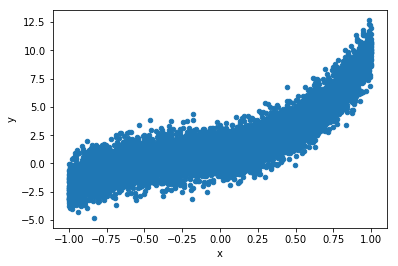

In [60]:
buf2.plot.scatter(x = "x", y = "y")